# PDAS CA1

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ignore warnings 
import warnings
warnings.filterwarnings("ignore")

# Example: Display all columns
pd.set_option('display.max_columns', None)

# 1) Loading Data

In [2]:
posting1 = pd.read_csv('postings1.csv')
posting2 = pd.read_csv('postings2.csv')
posting3 = pd.read_csv('postings3.csv')
posting4 = pd.read_csv('postings4.csv')
posting5 = pd.read_excel('postings5.xlsx')

# 2) Analysing Data

In [3]:
# show the datasets basic info
print(posting1.info())
print(posting2.info())
print(posting3.info())
print(posting4.info())
print(posting5.info())
# all datasets have job_id only as the common column
# there is an easter egg column in posting5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   job_id        123849 non-null  int64 
 1   company_name  122130 non-null  object
 2   title         123849 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   job_id       123849 non-null  int64  
 1   description  123842 non-null  object 
 2   max_salary   29793 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   job_id      123849 non-null  

In [4]:
print(posting5['Easter Egg'].head(5))
print(posting5['Easter Egg'].iloc[1])
# Easter egg tells me to merge data files together, clean it and display graphs.
# since job_id is common accross all datasets, we can merge on job_id

0    In order to score well for this module, you sh...
1    In order to score well for this module, you sh...
2    In order to score well for this module, you sh...
3    In order to score well for this module, you sh...
4    In order to score well for this module, you sh...
Name: Easter Egg, dtype: object
In order to score well for this module, you should be able to merge all the data files together, use pandas to check if the data is clean (and clean it), generate graphs that are helpful for understanding the data (and making decisions), and use mark down/text/comments in your code to make your code readable. 


In [5]:
# pring head of posting5
posting5.head()

,job_id,company_name,title,Easter Egg,Unimportant Column
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,"In order to score well for this module, you sh...",1.0
1,1829192,NaN,Mental Health Therapist/Counselor,"In order to score well for this module, you sh...",1.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,"In order to score well for this module, you sh...",1.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,"In order to score well for this module, you sh...",1.0
4,35982263,NaN,Service Technician,"In order to score well for this module, you sh...",1.0


In [6]:
# print head of posting 1
posting1.head()

# we can see that posting 5 is just posting 1 but with easter egg and useless column
# we do not need to merge posting5

,job_id,company_name,title
0,921716,Corcoran Sawyer Smith,Marketing Coordinator
1,1829192,NaN,Mental Health Therapist/Counselor
2,10998357,The National Exemplar,Assitant Restaurant Manager
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...
4,35982263,NaN,Service Technician


In [7]:
# merge all datasets
datasets = [posting2 , posting3 , posting4]

df = posting1
for dataset in datasets:
  # this merges datasets based on job_id
  df = pd.merge(df , dataset , on='job_id' , how='inner')

# check df to see changes
df

# we can confirm that all the datasets have been merged.

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,min_salary,formatted_work_type,applies,original_listed_time,remote_allowed,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,17.0,Full-time,2.0,1.713400e+12,NaN,https://www.linkedin.com/jobs/view/921716/?trk...,NaN,ComplexOnsiteApply,1.715990e+12,NaN,NaN,Requirements: \n\nWe are seeking a College or ...,1.713400e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,30.0,Full-time,NaN,1.712860e+12,NaN,https://www.linkedin.com/jobs/view/1829192/?tr...,NaN,ComplexOnsiteApply,1.715450e+12,NaN,NaN,NaN,1.712860e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,45000.0,Full-time,NaN,1.713280e+12,NaN,https://www.linkedin.com/jobs/view/10998357/?t...,NaN,ComplexOnsiteApply,1.715870e+12,NaN,NaN,We are currently accepting resumes for FOH - A...,1.713280e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,140000.0,Full-time,NaN,1.712900e+12,NaN,https://www.linkedin.com/jobs/view/23221523/?t...,NaN,ComplexOnsiteApply,1.715490e+12,NaN,NaN,This position requires a baseline understandin...,1.712900e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,60000.0,Full-time,NaN,1.713450e+12,NaN,https://www.linkedin.com/jobs/view/35982263/?t...,NaN,ComplexOnsiteApply,1.716040e+12,NaN,NaN,NaN,1.713450e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,120000.0,Full-time,NaN,1.713570e+12,NaN,https://www.linkedin.com/jobs/view/3906267117/...,NaN,ComplexOnsiteApply,1.716160e+12,NaN,Mid-Senior level,NaN,1.713570e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,NaN,Full-time,NaN,1.713570e+12,1.0,https://www.linkedin.com/jobs/view/3906267126/...,https://www.pinterestcareers.com/en/jobs/58824...,OffsiteApply,1.716160e+12,NaN,Mid-Senior level,NaN,1.713570e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,NaN,Full-time,NaN,1.713570e+12,1.0,https://www.linkedin.com/jobs/view/3906267131/...,https://epsoperations.bamboohr.com/careers/122...,OffsiteApply,1.716160e+12,NaN,Mid-Senior level,NaN,1.713570e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,NaN,Full-time,NaN,1.713570e+12,1.0,https://www.linkedin.com/jobs/view/3906267195/...,NaN,ComplexOnsiteApply,1.716160e+12,NaN,NaN,NaN,1.713570e+12,NaN,0,FULL_TIME,NaN,NaN


In [8]:
# display basic statistics
df.describe()

,job_id,max_salary,company_id,views,med_salary,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored
count,1.238490e+05,2.979300e+04,1.221320e+05,122160.000000,6280.000000,2.979300e+04,23320.000000,1.238490e+05,15246.0,1.238490e+05,1.073000e+03,1.238490e+05,123849.0
mean,3.896402e+09,9.193942e+04,1.220401e+07,14.618247,22015.619876,6.491085e+04,10.591981,1.713152e+12,1.0,1.716213e+12,1.712928e+12,1.713204e+12,0.0
std,8.404355e+07,7.011101e+05,2.554143e+07,85.903598,52255.873846,4.959738e+05,29.047395,4.846496e+08,0.0,2.321378e+09,3.619766e+08,3.988237e+08,0.0
min,9.217160e+05,1.000000e+00,1.009000e+03,1.000000,0.000000,1.000000e+00,1.000000,1.701810e+12,1.0,1.712900e+12,1.712350e+12,1.711320e+12,0.0
25%,3.894587e+09,4.828000e+01,1.435200e+04,3.000000,18.940000,3.700000e+01,1.000000,1.712860e+12,1.0,1.715480e+12,1.712670e+12,1.712890e+12,0.0
50%,3.901998e+09,8.000000e+04,2.269650e+05,4.000000,25.500000,6.000000e+04,3.000000,1.713400e+12,1.0,1.716040e+12,1.712670e+12,1.713410e+12,0.0
75%,3.904707e+09,1.400000e+05,8.047188e+06,8.000000,2510.500000,1.000000e+05,8.000000,1.713480e+12,1.0,1.716090e+12,1.713280e+12,1.713480e+12,0.0
max,3.906267e+09,1.200000e+08,1.034730e+08,9975.000000,750000.000000,8.500000e+07,967.000000,1.713570e+12,1.0,1.729120e+12,1.713560e+12,1.713570e+12,0.0


In [9]:
# check number of rows with .shape
print('Shape of data: ' , df.shape)

# there are 123849 rows of data with 32 columns

Shape of data:  (123849, 28)


In [10]:
# check number of missing values in each column
df.isna().sum().sort_values()

# there are a lot of missing values that i need to impute
# from all of this, my research question is: what factors will influence the salary of a job? 
# this will help me find high paying job in future

job_id                             0
work_type                          0
sponsored                          0
listed_time                        0
expiry                             0
application_type                   0
job_posting_url                    0
formatted_work_type                0
original_listed_time               0
title                              0
location                           0
description                        7
views                           1689
company_id                      1717
company_name                    1719
formatted_experience_level     29409
application_url                36665
posting_domain                 39968
compensation_type              87776
currency                       87776
pay_period                     87776
max_salary                     94056
min_salary                     94056
applies                       100529
remote_allowed                108603
med_salary                    117569
skills_desc                   121410
c

# 3) Data Cleaning

In [11]:
# company name and ids cannot be imputed
# we can clean numerical data with .interpolate and word data with .mode
number_cols = ['max_salary' , 'min_salary' , 'views' , 'applies' , 'closed_time']
df[number_cols] = df[number_cols].interpolate('linear')

In [12]:
# cannot impute descriptions as there are a lot of missing. This can lead to inaccuracy
words_cols = ['pay_period' , 'currency' , 'compensation_type' , 'posting_domain' , 'application_url' , 'formatted_experience_level']
def fill_with_mode(column):
  mode = column.mode().values[0]
  clean_data = column.fillna(mode)
  return clean_data

df[words_cols] = df[words_cols].apply(fill_with_mode)

In [13]:
# when viewing data, remote_allowed is dummy encoded. 
# so nan is just 0
df.loc[: , 'remote_allowed'] = df.loc[: , 'remote_allowed'].fillna(0)

In [14]:
# median salary can be imputed with (max - min)/2 + min
df['med_salary'] = ((df['max_salary'] - df['min_salary']) / 2) + df['min_salary']

In [15]:
# dropping remaining rows and columns
df.drop(['skills_desc'] , axis=1 , inplace=True)

df = df.dropna()

# we see the missing values
df.isna().sum().sort_values()

# there is so missing values, our data is finally clean. 

job_id                        0
work_type                     0
sponsored                     0
posting_domain                0
listed_time                   0
formatted_experience_level    0
closed_time                   0
expiry                        0
application_type              0
application_url               0
job_posting_url               0
remote_allowed                0
currency                      0
original_listed_time          0
formatted_work_type           0
min_salary                    0
med_salary                    0
views                         0
company_id                    0
location                      0
pay_period                    0
max_salary                    0
description                   0
title                         0
company_name                  0
applies                       0
compensation_type             0
dtype: int64

# 4) Data preping

In [16]:
# since salary can vary based on the pay period, we want to standaridise it to 'YEARLY'
# we assume 40 hour work weeks, 12 months worked
def standarize_salary(row):
  multiplier = 0
  if row['pay_period'] == 'HOURLY':
    multiplier = 40 * 4 * 12
  elif row['pay_period'] == 'WEEKLY':
    multiplier = 4 * 12
  elif row['pay_period'] == 'BIWEEKLY':
    multiplier = 2 * 12
  elif row['pay_period'] == 'MONTHLY':
    multiplier = 12
  elif row['pay_period'] == 'YEARLY':
    multiplier = 1 
  return pd.Series([row['med_salary'] * multiplier , row['min_salary'] * multiplier , row['max_salary'] *multiplier])

df[['adj_med_salary' , 'adj_min_salary' , 'adj_max_salary']] = df.apply(standarize_salary , axis=1)

In [17]:
df

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,min_salary,formatted_work_type,applies,original_listed_time,remote_allowed,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,adj_med_salary,adj_min_salary,adj_max_salary
110,3184403524,San José Clinic,Events & Communications Assistant,San José ClinicExxonMobil Foundation Community...,102500.000000,MONTHLY,"Houston, TX",1216717.0,5.0,87500.0,72500.000000,Internship,8.50,1.713210e+12,0.0,https://www.linkedin.com/jobs/view/3184403524/...,https://app.dataannotation.tech/worker_signup?...,SimpleOnsiteApply,1.715800e+12,1.713210e+12,Mid-Senior level,1.713210e+12,www.click2apply.net,0,INTERNSHIP,USD,BASE_SALARY,1050000.0,8.700000e+05,1.230000e+06
111,3189117072,"Signature Estate & Investment Advisors, LLC",Client Service Associate / Practice Manager,Company OverviewSignature Estate and Investmen...,100000.000000,YEARLY,"Redondo Beach, CA",1299114.0,6.0,85000.0,70000.000000,Full-time,4.75,1.713550e+12,0.0,https://www.linkedin.com/jobs/view/3189117072/...,https://app.dataannotation.tech/worker_signup?...,ComplexOnsiteApply,1.716140e+12,1.713210e+12,Mid-Senior level,1.713550e+12,www.click2apply.net,0,FULL_TIME,USD,BASE_SALARY,85000.0,7.000000e+04,1.000000e+05
112,3190494363,Florida Lifestyle Homes,Architectural Designer,Company Overview:Join our dynamic team at Flor...,66678.333333,YEARLY,"Fort Myers, FL",1886386.0,14.0,56675.5,46672.666667,Full-time,1.00,1.713460e+12,0.0,https://www.linkedin.com/jobs/view/3190494363/...,https://app.dataannotation.tech/worker_signup?...,ComplexOnsiteApply,1.716050e+12,1.713210e+12,Mid-Senior level,1.713460e+12,www.click2apply.net,0,FULL_TIME,USD,BASE_SALARY,56675.5,4.667267e+04,6.667833e+04
113,3196627399,Bellevue Downtown Association,Marketing & Communications – Content Writer In...,Marketing & Communications – Content Writer In...,33356.666667,HOURLY,"Bellevue, WA",88304.0,2.0,28351.0,23345.333333,Part-time,1.50,1.713480e+12,0.0,https://www.linkedin.com/jobs/view/3196627399/...,https://app.dataannotation.tech/worker_signup?...,SimpleOnsiteApply,1.716070e+12,1.713210e+12,Mid-Senior level,1.713480e+12,www.click2apply.net,0,PART_TIME,USD,BASE_SALARY,54433920.0,4.482304e+07,6.404480e+07
114,3211657373,AB Underground,Heavy Equipment Operator,Heavy Equipment Operator\nJob descriptionAB Un...,35.000000,HOURLY,"La Salle, CO",19071979.0,25.0,26.5,18.000000,Full-time,2.00,1.713460e+12,0.0,https://www.linkedin.com/jobs/view/3211657373/...,https://app.dataannotation.tech/worker_signup?...,ComplexOnsiteApply,1.729010e+12,1.713210e+12,Mid-Senior level,1.713460e+12,www.click2apply.net,0,FULL_TIME,USD,BASE_SALARY,50880.0,3.456000e+04,6.720000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.000000,YEARLY,"Walnut Creek, CA",56120.0,1.0,157500.0,120000.000000,Full-time,1.00,1.713570e+12,0.0,https://www.linkedin.com/jobs/view/3906267117/...,https://app.dataannotation.tech/worker_signup?...,ComplexOnsiteApply,1.716160e+12,1.713560e+12,Mid-Senior level,1.713570e+12,www.click2apply.net,0,FULL_TIME,USD,BASE_SALARY,157500.0,1.200000e+05,1.950000e+05
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,165000.000000,YEARLY,United States,1124131.0,3.0,136250.0,107500.000000,Full-time,1.00,1.713570e+12,1.0,https://www.linkedin.com/jobs/view/3906267126/...,https://www.pinterestcareers.com/en/jobs/58824...,OffsiteApply,1.716160e+12,1.713560e+12,Mid-Senior level,1.713570e+12,www.pinterestcareers.com,0,FULL_TIME,USD,BASE_SALARY,136250.0,1.075000e+05,1.650000e+05
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nE

# 5) Plotting Graphs

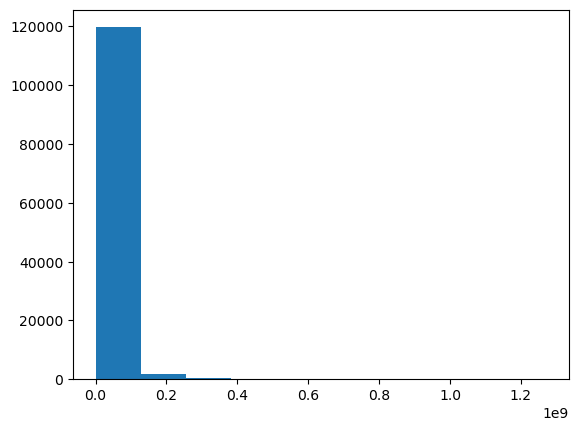

In [ ]:
# hist of median salary
plt.hist(df['adj_med_salary'].values , bins=10)
plt.show()
# slight positive skewd, sugguest large positive outliers

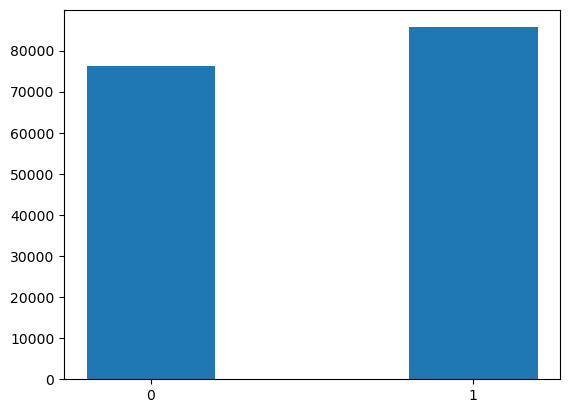

In [39]:
# bar chart of remote allowed and median salary
remote_allowed_pivot = df.pivot_table(values='adj_med_salary' , index='remote_allowed' , aggfunc='median')

plt.bar(remote_allowed_pivot.index , remote_allowed_pivot.values.flatten() , width=0.4)
plt.xticks([0 ,1])
plt.show()

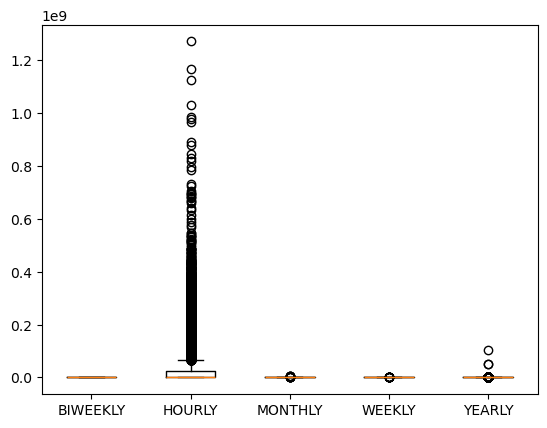

In [ ]:
pay_period = df.groupby(by='pay_period')['adj_med_salary']
data = []
for group in pay_period.groups:
  data.append(pay_period.get_group(group))

plt.boxplot(data , labels=pay_period.groups.keys())
plt.show()

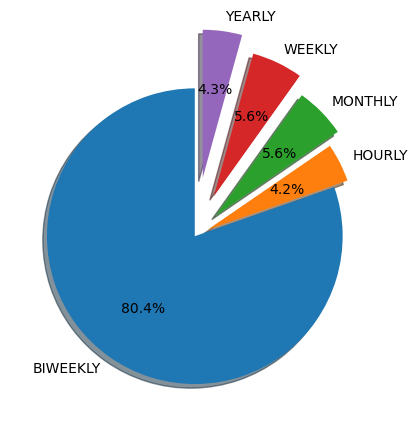

In [59]:
plt.pie(pay_period.median().values , labels=pay_period.groups.keys() , autopct='%1.1f%%' , shadow=True, startangle=90 ,explode=(0 , 0.1 , 0.2 , 0.3, 0.4))
plt.show()

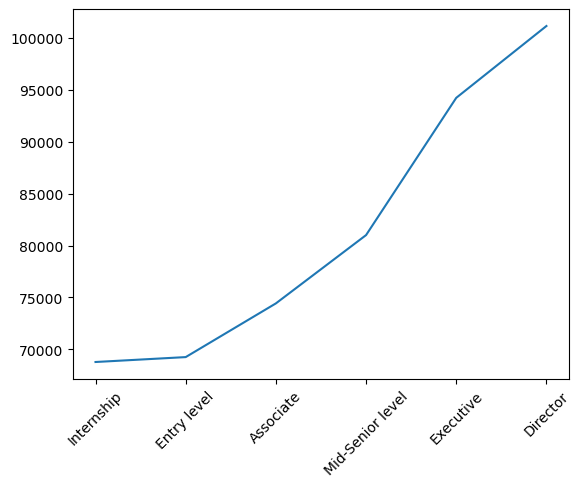

In [63]:
experience_level = df.groupby(by='formatted_experience_level')['adj_med_salary'].median()
sorted_experience_level = ['Internship' , 'Entry level' , 'Associate' , 'Mid-Senior level' , 'Executive' , 'Director']

# reindexing will autosort for us
experience_level = experience_level.reindex(sorted_experience_level)

plt.plot(experience_level.index , experience_level.values)
plt.xticks(rotation=45)
plt.show()

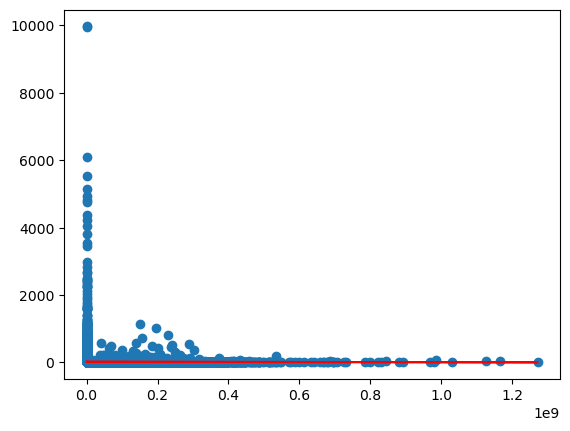

In [69]:
m , c = np.polyfit(df['adj_med_salary'] , df['views'] , deg=1)
plt.scatter(df['adj_med_salary'] , df['views'])
plt.plot(df['adj_med_salary'] , df['adj_med_salary'] * m + c , 'r')
plt.show()